## The Data

### Handwritten Digit Recognition Dataset (MNIST)

In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). 

The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. 

The images have a resolution of $28\times 28$ pixels.

### The MNIST Dataset in TensorFlow

You can use the tensorflow build-in functionality to download and import the dataset into python (see *Setup* section below). But note that this will be the only usage of TensorFlow in this assignment.

## The Assignment

### Objectives

This assignment will be mirroring the first assignment (DL_hw1), but this time you are **not allowed to use any of the Tensorflow functionality for specifing nor optimizing** your neural network models. 
You will now use your **own implementations** of different neural network models (labelled Model 1-4, and described in the corresponding sections of the Colab).

As before, you will train these models to classify hand written digits from the Mnist dataset. 

Keep in mind, the purpose of this exercise is to implement and optimize your own neural networks
architectures without the toolbox/library tailored to do so. This also means, in order to train and evaluate your models, you will need to implement your own optimization procedure. You are to use the same cross-entropy loss as before and your own implementation of SGD.

#### Additional instruction:

**Do not use any other libraries than the ones provided in the imports cell.** You should be able to do everything via *numpy* (especially for the convolutional layer, rely on the in-built matrix/tensor multiplication that numpy offers).  

There are a few questions at the end of the colab. **Before doing any coding, please take look at Question 1** -- this should help you with the implementations, especially the optimization part.


### Variable Initialization

Initialize the variables containing the parameters using [Xavier initialization](http://proceedings.mlr.press/v9/glorot10a.html).

### Hyper-parameters

For each of these models you will be requested to run experiments with different hyper-parameters.

More specifically, you will be requested to try 3 sets of hyper-parameters per model, and report the resulting model accuracy.

Each combination of hyper-parameter will specify how to set each of the following:

- **num_epochs**: Number of iterations through the training section of the dataset [*a positive integer*].

- **learning_rate**: Learning rate used by the gradient descent optimizer [*a scalar between 0 and 1*]

In all experiments use a *batch_size* of 100.

### Loss function
All models, should be trained as to minimize the **cross-entropy loss** function:
$$
\mathrm{loss}
~~=~~
-\sum_{i=1}^N \log p(y_i|x_i, \theta)
~~=~~
-\sum_{i=1}^N \log{ \underbrace{\left(\frac{\exp(z_{i}[y_i])}{\sum_{c=1}^{10} \exp(z_{i}[c])}\right)}_{\text{softmax output}}}
~~=~~
\sum_{i=1}^N \left( -z_{i}[y_i] + \log{\left( \sum_{c=1}^{10} \exp(z_{i}[c]) \right)} \right)$$
where $z \in \mathbb{R}^{10}$ is the input to the softmax layer and $z{[c]}$ denotes the $c$-th entry of vector $z$. And $i$ is a index for the dataset $\{(x_i, y_i)\}_{i=1}^N$.


### Optimization

Use **stochastic gradient descent (SGD)** for optimizing the loss function. Sum over the batch.


### Training and Evaluation

The tensorflow built-in functionality for downloading and importing the dataset into python returns a Datasets object.

This object will have three attributes: 

- train

- validation

- test

Use only the **train** data in order to optimize the model.

Use *datasets.train.next_batch(100)* in order to sample mini-batches of data.

Every 20000 training samples (i.e. every 200 updates to the model), interrupt training and measure the accuracy of the model, 

each time evaluate the accuracy of the model both on 20% of the **train** set and on the entire **test** set.

### Reporting

For each model i, you will collect the learning curves associated to each combination of hyper-parameters.

Use the utility function `plot_learning_curves` to plot these learning curves,

and the and utility function `plot_summary_table` to generate a summary table of results.

For each run collect the train and test curves in a tuple, together with the hyper-parameters.

    experiments_task_i = [

       (num_epochs_1, learning_rate_1), train_accuracy_1, test_accuracy_1),
    
       (num_epochs_2, learning_rate_2), train_accuracy_2, test_accuracy_2),
    
       (num_epochs_3, learning_rate_3), train_accuracy_3, test_accuracy_3)]


# Imports and utility functions (do not modify!)

In [0]:
# Import useful libraries.
import time
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import random

# Global variables.
log_period_samples = 20000
batch_size = 100

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 784])
  y_ = tf.placeholder(tf.float32, [None, 10])
  return x, y_

# Plot learning curves of experiments
def plot_learning_curves(experiment_data):
  # Generate figure.
  fig, axes = plt.subplots(3, 4, figsize=(22,12))
  st = fig.suptitle(
      "Learning Curves for all Tasks and Hyper-parameter settings",
      fontsize="x-large")
  # Plot all learning curves.
  for i, results in enumerate(experiment_data):
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      # Plot.
      xs = [x * log_period_samples for x in range(1, len(train_accuracy)+1)]
      axes[j, i].plot(xs, train_accuracy, label='train_accuracy')
      axes[j, i].plot(xs, test_accuracy, label='test_accuracy')
      # Prettify individual plots.
      axes[j, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
      axes[j, i].set_xlabel('Number of samples processed')
      axes[j, i].set_ylabel('Epochs: {}, Learning rate: {}.  Accuracy'.format(*setting))
      axes[j, i].set_title('Task {}'.format(i + 1))
      axes[j, i].legend()
  # Prettify overall figure.
  plt.tight_layout()
  st.set_y(0.95)
  fig.subplots_adjust(top=0.91)
  plt.show()

# Generate summary table of results.
def plot_summary_table(experiment_data):
  # Fill Data.
  cell_text = []
  rows = []
  columns = ['Setting 1', 'Setting 2', 'Setting 3']
  for i, results in enumerate(experiment_data):
    rows.append('Model {}'.format(i + 1))
    cell_text.append([])
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      cell_text[i].append(test_accuracy[-1])
  # Generate Table.
  fig=plt.figure(frameon=False)
  ax = plt.gca()
  the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
  the_table.scale(1, 4)
  # Prettify.
  ax.patch.set_facecolor('None')
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

In [0]:
# Definition of auxiliary functions
def relu(x):
  x_0 = np.zeros((x.shape[0],x.shape[1]))
  return np.maximum(x,x_0)

def softmax(x): # where x is an 2D array
  x_max = np.max(x,axis=1)
  y = x-x_max.reshape((x.shape[0],1))
  exp_y =  np.exp(y)
  su_exp = np.sum(exp_y,axis=1)
  return exp_y/su_exp.reshape((x.shape[0],1))

def relu_derivative(x):
  if x>0:
    aux = 1
  else:
    aux = 0
  return aux

def cross_entrophy(y_train,y_estimated):
  aux = -1*np.multiply(y_train,np.log(y_estimated))
  aux_2 = np.sum(aux,axis=1)
  return np.average(aux_2)

def xavier_ini(n_in,n_out):
  #initializer = np.random.normal(0,1)*np.sqrt(2/n_in)
  initializer = np.random.uniform(-np.sqrt(6)/(np.sqrt(n_in+n_out)),np.sqrt(6)/(np.sqrt(n_in+n_out)))
  return initializer

def accuracy(y_predict,y_label):
  predict_label = np.argmax(y_predict,axis = 1)
  true_label = np.argmax(y_label,axis = 1)
  compare = predict_label == true_label
  accuracy = np.average(compare)
  return accuracy

# Model 1 (10 pts)

### Model

Train a neural network model consisting of 1 linear layer, followed by a softmax:

(input $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.0001

- *num_epochs*=5, *learning_rate*=0.005

- *num_epochs*=5, *learning_rate*=0.1

In [0]:
## Definition of functions for model 1
def feedforward(x_set,w,b):
  x = np.matmul(x_set,w) + b.reshape((1,b.shape[0]))
  out = softmax(x)
  feed_elements = [x,out]
  return feed_elements
  
def backpropagation(feed_elements,y_train,x_train):
  x = feed_elements[0]
  out = feed_elements[1]
  # ----- Back-prop algorithm ---------
  delta = np.transpose(out - y_train)
  gradient_w = np.transpose(np.matmul(delta,x_train))
  gradient_b = np.sum(delta,axis=1)

  gradient = [gradient_w,gradient_b]
  return gradient

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task1 = []
settings = [(5, 0.0001), (5, 0.005), (5, 0.1)]

In [25]:
print('Training Model 1')
start_time = time.time()
# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:

  # Reset graph, recreate placeholders and dataset.
  mnist = get_data()
  eval_mnist = get_data()
  
  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  x_accuracy_train = np.array(mnist.train.images[0:11000,:])
  y_accuracy_train = np.array(mnist.train.labels[0:11000,:])
  
  x_accuracy_test = np.array(mnist.test.images)
  y_accuracy_test = np.array(mnist.test.labels)
  
  # We initialize weights
  w1 = np.array([[random.gauss(0,xavier_ini(784,10)) for i in range(0,10)] for i in range(0,784)])
  b1 = np.array([random.gauss(0,xavier_ini(784,10)) for i in range(0,10)])
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  while mnist.train.epochs_completed < num_epochs:

    # Update.
    i += 1
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    batch_xs = np.array(batch_xs)
    batch_ys = np.array(batch_ys)
    #################
    # Training step #
    #################
    feed_elements = feedforward(batch_xs,w1,b1)
    gradient = backpropagation(feed_elements,batch_ys,batch_xs)
    w1 = w1 - learning_rate*gradient[0]
    b1 = b1 - learning_rate*gradient[1]
    # Periodically evaluate.
    if i % log_period_updates == 0:

      #####################################
      # Compute and store train accuracy. #
      #####################################
      train = feedforward(x_accuracy_train,w1,b1)
      aux_accuracy_train = accuracy(train[1],y_accuracy_train)
      train_accuracy.append(aux_accuracy_train)
      #####################################
      # Compute and store test accuracy.  #
      #####################################
      test = feedforward(x_accuracy_test,w1,b1)
      aux_accuracy_test = accuracy(test[1],y_accuracy_test)
      test_accuracy.append(aux_accuracy_test)
      
  experiments_task1.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

print(time.time() - start_time)

Training Model 1
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MN

# Model 2 (15 pts)

1 hidden layer (32 units) with a ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=15, *learning_rate*=0.0001

- *num_epochs*=15, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1 

In [0]:
## Definition of functions for model 2
def feedforward(x_set,w1,b1,w2,b2):
  x1 = np.matmul(x_set,w1) + b1.reshape((1,b1.shape[0]))
  h1 = relu(x1)
  x2 = np.matmul(h1,w2)+b2.reshape((1,b2.shape[0]))
  out = softmax(x2)
  feed_elements = [x1,h1,x2,out]
  return  feed_elements

def backpropagation(feed_elements,y_train,x_train):
  x1 = feed_elements[0]
  h1 = feed_elements[1]
  x2 = feed_elements[2]
  out = feed_elements[3]
  
  # ----- Gradient w2 and b2 ---------
  delta_w2 = np.transpose(out - y_train)
  gradient_w2 = np.transpose(np.matmul(delta_w2,h1))
  gradient_b2 = np.sum(delta_w2,axis=1)

  ##--- Gradient w1 and b1 -----------
  dRelu = np.vectorize(relu_derivative) #Vectorize relu_derivative function so it works element wise in a matrix
  daux_w1 = np.transpose(dRelu(x1))
  delta_w1 = daux_w1*np.matmul(w2,delta_w2)
  gaux_w1 = np.matmul(delta_w1,x_train)
  
  gradient_w1 = np.transpose(gaux_w1)
  gradient_b1 = np.sum(delta_w1,axis=1)
  gradient = [gradient_w2,gradient_b2,gradient_w1,gradient_b1]
  return gradient

In [0]:
# CAREFUL: Running this CL resets the experiments_task2 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task2 = []
settings = [(15, 0.0001), (15, 0.005), (15, 0.1)]
#settings = [(15, 0.1)]

In [28]:
print('Training Model 2')
start_time = time.time()

# Train Model 2 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  x_accuracy_train = np.array(mnist.train.images[0:11000,:])
  y_accuracy_train = np.array(mnist.train.labels[0:11000,:])
  
  x_accuracy_test = np.array(mnist.test.images)
  y_accuracy_test = np.array(mnist.test.labels)
  
  # We initialize weights
  w1 = np.array([[xavier_ini(784,32) for i in range(0,32)] for i in range(0,784)])
  b1 = np.array([xavier_ini(784,32) for i in range(0,32)])
  
  w2 = np.array([[xavier_ini(32,10) for i in range(0,10)] for i in range(0,32)])
  b2 = np.array([xavier_ini(32,10) for i in range(0,10)])
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  while mnist.train.epochs_completed < num_epochs:

    # Update.
    i += 1
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    batch_xs = np.array(batch_xs)
    batch_ys = np.array(batch_ys)
    #################
    # Training step #
    #################
    feed_elements = feedforward(batch_xs,w1,b1,w2,b2)
    gradient = backpropagation(feed_elements,batch_ys,batch_xs)
    w2 = w2 - learning_rate*gradient[0]
    b2 = b2 - learning_rate*gradient[1]
    w1 = w1 - learning_rate*gradient[2]
    b1 = b1 - learning_rate*gradient[3]
    
    # Periodically evaluate.
    if i % log_period_updates == 0:

      #####################################
      # Compute and store train accuracy. #
      #####################################
      train = feedforward(x_accuracy_train,w1,b1,w2,b2)
      aux_accuracy_train = accuracy(train[3],y_accuracy_train)
      train_accuracy.append(aux_accuracy_train)
      #####################################
      # Compute and store test accuracy.  #
      #####################################
      test = feedforward(x_accuracy_test,w1,b1,w2,b2)
      aux_accuracy_test = accuracy(test[3],y_accuracy_test)
      test_accuracy.append(aux_accuracy_test)
  
  experiments_task2.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))
  
print(time.time() - start_time)

Training Model 2
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MN

# Model 3 (15 pts)

2 hidden layers (32 units) each, with ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.05

In [0]:
# Definitions of functions for model 3
def feedforward(x_set,w1,b1,w2,b2,w3,b3):
    x1 = np.matmul(x_set,w1) + b1.reshape((1,b1.shape[0]))
    h1 = relu(x1)
    x2 = np.matmul(h1,w2)+b2.reshape((1,b2.shape[0]))
    h2 = relu(x2)
    x3 = np.matmul(h2,w3)+b3.reshape((1,b3.shape[0]))
    out= softmax(x3)
    feed_elements = [x1,h1,x2,h2,x3,out]
    return feed_elements

def backpropagation(feed_elements,y_train,x_train):
    #Definition of variables to use
    x1 = feed_elements[0]
    h1 = feed_elements[1]
    x2 = feed_elements[2]
    h2 = feed_elements[3]
    x3 = feed_elements[4]
    out= feed_elements[5]
    
    # ------------- Backpropagation algorithm ----------------------------
    ##--- W3 and b3 gradient
    delta_w3 = np.transpose(out - y_train)
    gaux_w3 = np.matmul(delta_w3,h2)
    gradient_w3 = np.transpose(gaux_w3)
    gradient_b3 = np.sum(delta_w3,axis=1)

    ##--- W2 and b2 gradient
    dRelu = np.vectorize(relu_derivative) #Vectorize relu_derivative function so it works element wise in a matrix
    daux_w2 = np.transpose(dRelu(x2))
    delta_w2 = daux_w2*np.matmul(w3,delta_w3)
    gaux_w2 = np.matmul(delta_w2,h1)
    gradient_w2 = np.transpose(gaux_w2)
    gradient_b2 = np.sum(delta_w2,axis=1)

    ##--- W1 and b1 gradient ------
    daux_w1 = np.transpose(dRelu(x1))
    delta_w1 = daux_w1*np.matmul(w2,delta_w2)
    gaux_w1 = np.matmul(delta_w1,x_train)
    gradient_w1 = np.transpose(gaux_w1)
    gradient_b1 = np.sum(delta_w1,axis=1)

    #list to return
    gradient = [gradient_w3,gradient_b3,gradient_w2,gradient_b2,gradient_w1,gradient_b1]
    return gradient

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task3 = []
settings = [(5, 0.003), (40, 0.003), (40, 0.05)]

In [33]:
print('Training Model 3')
start_time = time.time()

# Train Model 3 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  x_accuracy_train = np.array(mnist.train.images[0:11000,:])
  y_accuracy_train = np.array(mnist.train.labels[0:11000,:])
  
  x_accuracy_test = np.array(mnist.test.images)
  y_accuracy_test = np.array(mnist.test.labels)
  
  # We initialize weights
  
  w1 = np.array([[xavier_ini(784,32) for i in range(0,32)] for i in range(0,784)])
  b1 = np.array([xavier_ini(784,32) for i in range(0,32)])
  
  w2 = np.array([[xavier_ini(784,32) for i in range(0,32)] for i in range(0,32)])
  b2 = np.array([xavier_ini(784,32) for i in range(0,32)])
  
  w3 = np.array([[xavier_ini(32,10) for i in range(0,10)] for i in range(0,32)])
  b3 = np.array([xavier_ini(32,10) for i in range(0,10)])
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  while mnist.train.epochs_completed < num_epochs:

    # Update.
    i += 1
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    batch_xs = np.array(batch_xs)
    batch_ys = np.array(batch_ys)
    #################
    # Training step #
    #################
    feed_elements = feedforward(batch_xs,w1,b1,w2,b2,w3,b3)
    gradient = backpropagation(feed_elements,batch_ys,batch_xs)
    
    w3 = w3 - learning_rate*gradient[0]
    b3 = b3 - learning_rate*gradient[1]
    w2 = w2 - learning_rate*gradient[2]
    b2 = b2 - learning_rate*gradient[3]
    w1 = w1 - learning_rate*gradient[4]
    b1 = b1 - learning_rate*gradient[5]
    
    # Periodically evaluate.
    if i % log_period_updates == 0:

      #####################################
      # Compute and store train accuracy. #
      #####################################
      train = feedforward(x_accuracy_train,w1,b1,w2,b2,w3,b3)
      aux_accuracy_train = accuracy(train[5],y_accuracy_train)
      train_accuracy.append(aux_accuracy_train)
      #####################################
      # Compute and store test accuracy.  #
      #####################################
      test = feedforward(x_accuracy_test,w1,b1,w2,b2,w3,b3)
      aux_accuracy_test = accuracy(test[5],y_accuracy_test)
      test_accuracy.append(aux_accuracy_test)

  experiments_task3.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))
  
print(time.time() - start_time)

Training Model 3
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MN

# Results

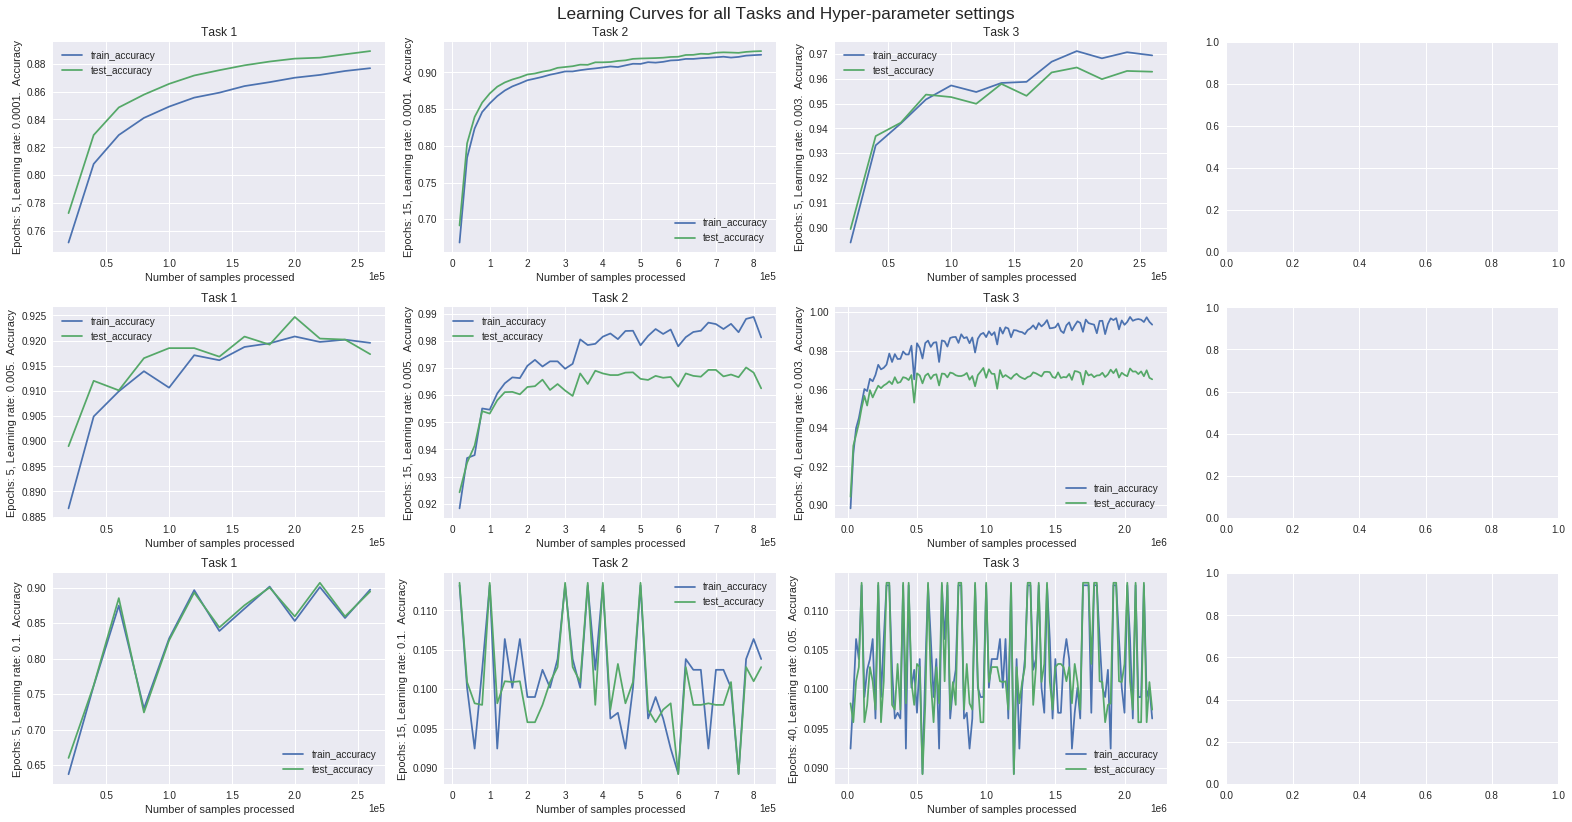

In [19]:
#plot_learning_curves([experiments_task1, experiments_task2, experiments_task3, experiments_task4])
plot_learning_curves([experiments_task1,experiments_task2,experiments_task3])
#plot_learning_curves([experiments_task2])

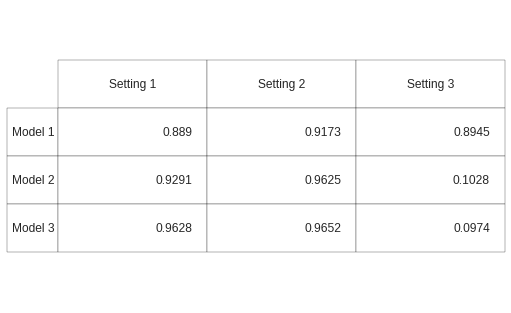

In [20]:
#plot_summary_table([experiments_task1, experiments_task2, experiments_task3, experiments_task4])
plot_summary_table([experiments_task1, experiments_task2, experiments_task3])